<a href="https://colab.research.google.com/github/Macleyn/ML/blob/main/%D0%A6%D0%9A_%D0%9C%D0%A4%D0%A2%D0%98/PCA_TSNE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
digits = load_digits(as_frame=True)

X = digits.data
y = digits.target

pca = PCA(n_components=3)
pca_result = pca.fit_transform(X)

df = pd.DataFrame(pca_result, columns=['pca-one', 'pca-two', 'pca-three'])
df['target'] = y

pca.explained_variance_ratio_

array([0.14890594, 0.13618771, 0.11794594])

In [3]:
tsne = TSNE()
tsne_result = tsne.fit_transform(X)

df_tsne = pd.DataFrame(data = tsne_result, columns=['feature_1', 'feature_2'])
df_tsne['target'] = y

In [4]:
fig = px.scatter_3d(
    df,
    x='pca-one',      # Первая главная компонента
    y='pca-two',      # Вторая главная компонента
    z='pca-three',    # Третья главная компонента
    color='target',    # Цвет точек по классам (цифрам 0-9)
    title='3D визуализация PCA для набора цифр'
)
fig.show()

In [5]:
px.scatter(
    df_tsne,
    x = 'feature_1',
    y = 'feature_2',
    color = 'target'
)

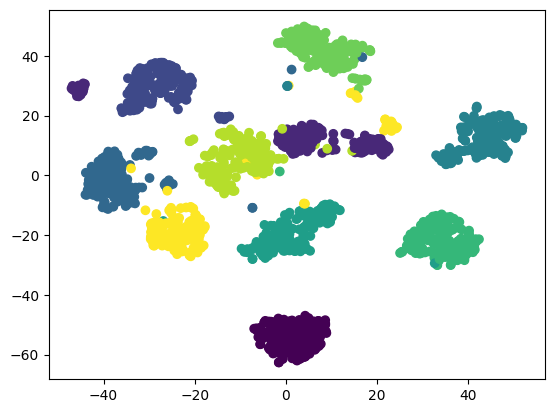

In [6]:
plt.figure()
plt.scatter(df_tsne['feature_1'], df_tsne['feature_2'], c = df_tsne['target'])

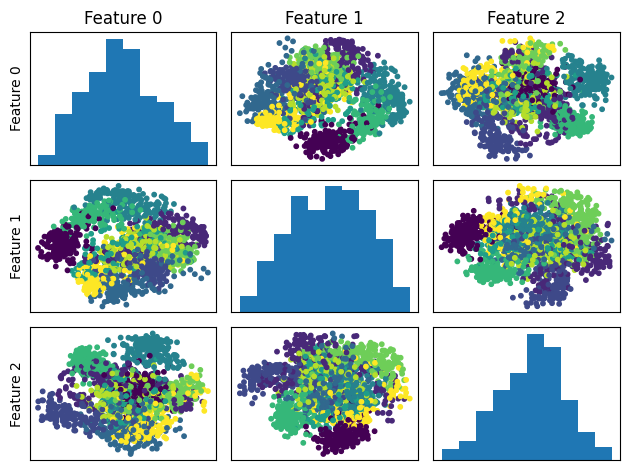

In [27]:
fig, ax = plt.subplots(nrows=3, ncols=3)
for i in range(3):
  for j in range(3):
    if i == j:
      ax[i, j].hist(df.iloc[:,i])
    else:
      ax[i, j].scatter(df.iloc[:,i], df.iloc[:,j], c=df['target'],s = 10)
    ax[i, j].set_xticks([])
    ax[i, j].set_yticks([])
    if i == 0:
        ax[i, j].set_title(f'Feature {j}')
    if j == 0:
        ax[i, j].set_ylabel(f'Feature {i}')
plt.tight_layout()
plt.show()

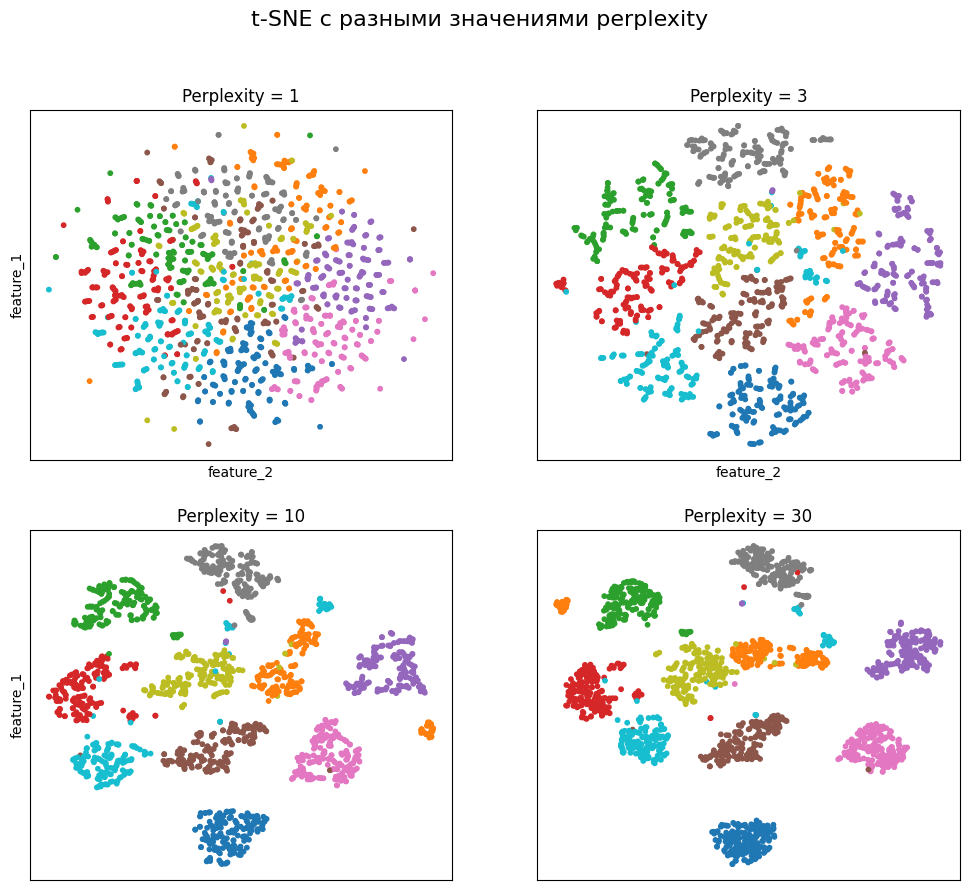

In [29]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.suptitle('t-SNE с разными значениями perplexity', fontsize=16)

for i, perplexity in enumerate([1, 3, 10, 30]):
  tsne = TSNE(perplexity=perplexity, random_state=42)
  tsne_result = tsne.fit_transform(X)

  df_tsne = pd.DataFrame(data = tsne_result, columns=['feature_1', 'feature_2'])
  df_tsne['target'] = y

  row, col = i // 2, i % 2

  ax[row, col].scatter(df_tsne['feature_1'], df_tsne['feature_2'], cmap='tab10', c=df_tsne['target'], s=10)
  ax[row, col].set_xticks([])
  ax[row, col].set_yticks([])
  if row == 0:
        ax[row, col].set_xlabel('feature_2')
  if col == 0:
        ax[row, col].set_ylabel('feature_1')
  ax[row, col].set_title(f'Perplexity = {perplexity}')
